# EDA

- 84406개의 데이터
- ID : 샘플 별 고유 id
- 월 : 사건 발생월
- 요일 : 월요일 ~ 일요일
- 시간 : 사건 발생 시각
- 소관경찰서 : 사건 발생 구역의 담당 경찰서
- 소관지역 : 사건 발생 구역
- 사건발생거리 : 가장 가까운 경찰서에서 사건 현장까지의 거리
- 강수량(mm) 
- 강설량(mm)
- 적설량(cm) 
- 풍향 : 범죄발생지에서 바람이 부는 방향(최대 360도)
- 안개 : 가시거리가 1km 미만인 경우
- 짙은안개 : 가시거리가 200m 미만인 경우
- 번개
- 진눈깨비
- 서리
- 연기/연무 : 먼지, 연기가 하늘을 가리는 현상
- 눈날림
- 범죄발생지 : 범죄가 발생한 장소
- TARGET : 범죄타입 [0 : 강도, 1: 절도, 2: 상해]

In [92]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('./train.csv', encoding='UTF-8')

In [3]:
df.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [4]:
df.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<AxesSubplot:xlabel='소관경찰서', ylabel='count'>

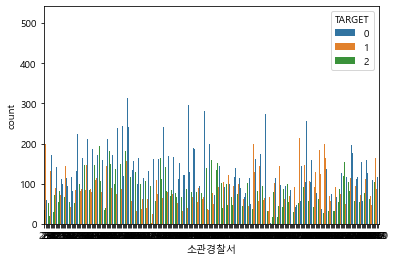

In [6]:
sns.countplot(x=df['소관경찰서'], hue=df['TARGET'])

In [ ]:
pd.crosstab(df['범죄발생지'], df['TARGET'], margins=False)

TARGET,0,1,2
범죄발생지,,,
공원,296,307,133
백화점,172,1291,30
병원,281,128,44
식당,887,615,304
약국,96,541,16
은행,61,29,42
인도,4537,865,1035
주거지,19566,8349,8162
주유소,606,371,347


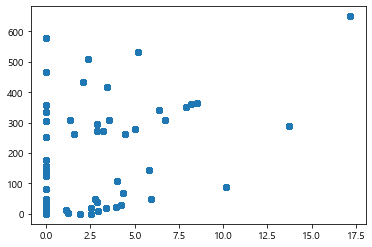

In [11]:
plt.scatter(df['강설량(mm)'].apply(lambda x: math.sqrt(x)) ,df['적설량(cm)'])

In [12]:
df['TARGET'].value_counts()

0    36453
1    25397
2    22556
Name: TARGET, dtype: int64

In [13]:
df['요일'].value_counts()

토요일    13317
일요일    12837
금요일    12243
월요일    11702
화요일    11566
수요일    11410
목요일    11331
Name: 요일, dtype: int64

CPU times: total: 45.5 s
Wall time: 47.7 s


<Figure size 2880x2880 with 0 Axes>

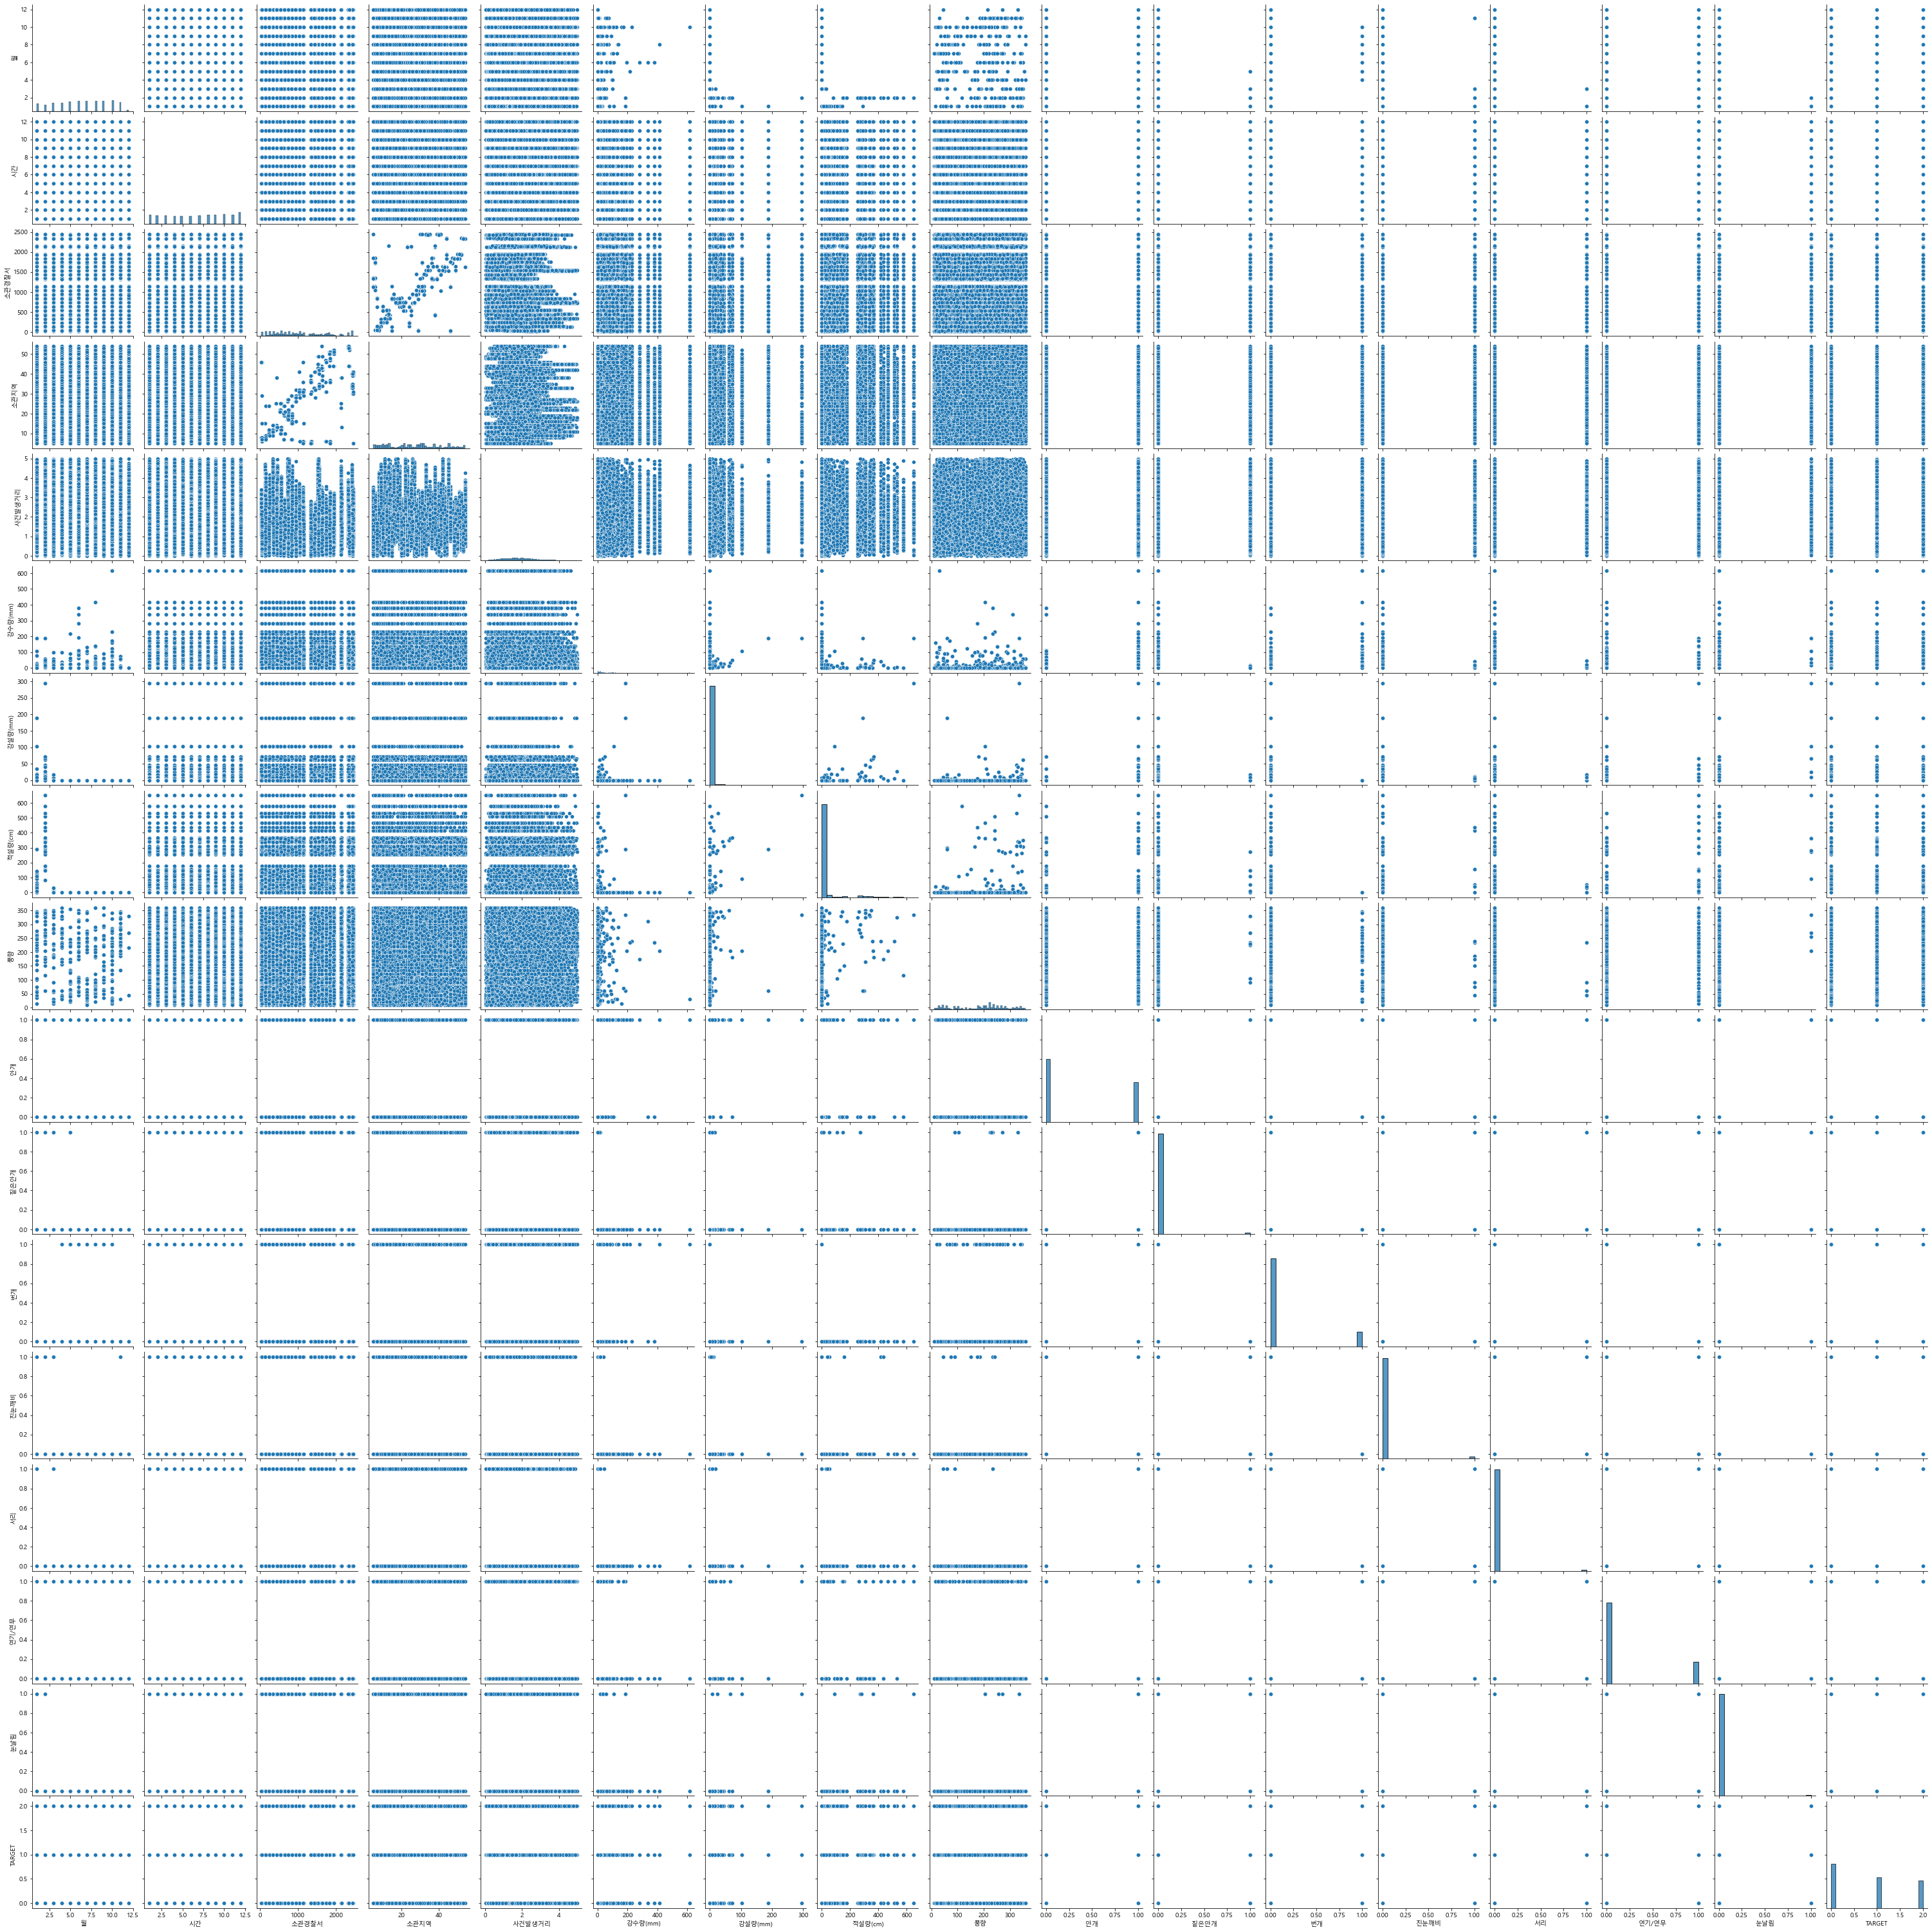

In [14]:
%%time
plt.figure(figsize=(40,40))
sns.pairplot(df)

<AxesSubplot:xlabel='요일', ylabel='count'>

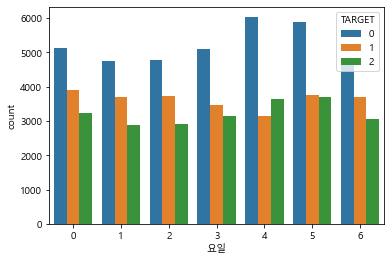

In [98]:
sns.countplot(x=df['요일'], hue=df['TARGET'])

In [15]:
df = pd.read_csv('./train.csv', encoding='UTF-8')
encoder_day = LabelEncoder()
df['요일'] = encoder_day.fit_transform(df[['요일']])
encoder_loc = LabelEncoder()
df['범죄발생지'] = encoder_loc.fit_transform(df[['범죄발생지']])

<AxesSubplot:>

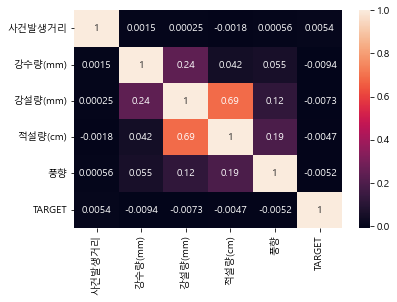

In [18]:
# 수치형-수치형 상관분석
df_n = df[['사건발생거리', '강수량(mm)', '강설량(mm)', '적설량(cm)', '풍향','TARGET']]
sns.heatmap(df_n.corr(method='spearman'), annot=True)

In [34]:
# 범주형-범주형 상관분석 (Cramer's V)
o_cols = ['월', '시간', '소관경찰서', '소관지역', '범죄발생지', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림', 'TARGET']
df_ = df[o_cols].astype(int)
df_o = pd.DataFrame(index=o_cols, columns=o_cols)
for col in df_o.columns:
    for i in df_o.index:
        observed_table = pd.crosstab(df[i], df[col], margins=False)
        df_o.loc[i,col] = association(observed_table, method='cramer')
        
df_o.style.background_gradient(axis=0)

,월,시간,소관경찰서,소관지역,범죄발생지,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
월,1.000000,0.013036,0.068475,0.035105,0.042108,0.282099,0.234518,0.440820,0.268153,0.241153,0.279649,0.296600,0.030899
시간,0.013036,1.000000,0.062029,0.028313,0.028512,0.011116,0.010938,0.014660,0.023301,0.019717,0.013466,0.008479,0.033728
소관경찰서,0.068475,0.062029,1.000000,0.835215,0.204258,0.058157,0.059454,0.060262,0.060147,0.058270,0.058360,0.061337,0.221936
소관지역,0.035105,0.028313,0.835215,1.000000,0.121813,0.024024,0.029830,0.025900,0.028412,0.028800,0.026896,0.030870,0.185310
범죄발생지,0.042108,0.028512,0.204258,0.121813,1.000000,0.018683,0.021041,0.029301,0.024989,0.024208,0.020737,0.025113,0.295534
안개,0.282099,0.011116,0.058157,0.024024,0.018683,1.000000,0.170198,0.350586,0.106531,0.128567,0.407581,0.119805,0.005665
짙은안개,0.234518,0.010938,0.059454,0.029830,0.021041,0.170198,1.000000,0.055291,0.224735,0.328208,0.075400,0.144259,0.003336
번개,0.440820,0.014660,0.060262,0.025900,0.029301,0.350586,0.055291,1.000000,0.059095,0.041767,0.060528,0.038920,0.007441
진눈깨비,0.268153,0.023301,0.060147,0.028412,0.024989,0.106531,0.224735,0.059095,1.000000,0.565150,0.111839,0.013667,0.012200
서리,0.241153,0.019717,0.058270,0.028800,0.024208,0.128567,0.328208,0.041767,0.565150,1.000000,0.094404,0.009660,0.013938


In [26]:
# 범주형-범주형 상관분석 (Cramer's V)
o_cols = ['월', '시간', '소관경찰서', '소관지역', '범죄발생지', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림', 'TARGET']
df_ = df[o_cols].astype(int)
df_o = pd.DataFrame(index=o_cols, columns=o_cols)
for col in df_o.columns:
    for i in df_o.index:
        observed_table = pd.crosstab(df[i], df[col], margins=False)
        df_o.loc[i,col] = association(observed_table, method='cramer')
        
df_o.style.background_gradient(axis=0)

,월,시간,소관경찰서,소관지역,범죄발생지,풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
월,1.000000,0.013036,0.068475,0.035105,0.042108,0.244060,0.282099,0.234518,0.440820,0.268153,0.241153,0.279649,0.296600,0.030899
시간,0.013036,1.000000,0.062029,0.028313,0.028512,0.012581,0.011116,0.010938,0.014660,0.023301,0.019717,0.013466,0.008479,0.033728
소관경찰서,0.068475,0.062029,1.000000,0.835215,0.204258,0.058526,0.058157,0.059454,0.060262,0.060147,0.058270,0.058360,0.061337,0.221936
소관지역,0.035105,0.028313,0.835215,1.000000,0.121813,0.025916,0.024024,0.029830,0.025900,0.028412,0.028800,0.026896,0.030870,0.185310
범죄발생지,0.042108,0.028512,0.204258,0.121813,1.000000,0.017427,0.018683,0.021041,0.029301,0.024989,0.024208,0.020737,0.025113,0.295534
풍향,0.244060,0.012581,0.058526,0.025916,0.017427,1.000000,0.257393,0.196156,0.283738,0.167214,0.152166,0.231820,0.150784,0.021303
안개,0.282099,0.011116,0.058157,0.024024,0.018683,0.257393,1.000000,0.170198,0.350586,0.106531,0.128567,0.407581,0.119805,0.005665
짙은안개,0.234518,0.010938,0.059454,0.029830,0.021041,0.196156,0.170198,1.000000,0.055291,0.224735,0.328208,0.075400,0.144259,0.003336
번개,0.440820,0.014660,0.060262,0.025900,0.029301,0.283738,0.350586,0.055291,1.000000,0.059095,0.041767,0.060528,0.038920,0.007441
진눈깨비,0.268153,0.023301,0.060147,0.028412,0.024989,0.167214,0.106531,0.224735,0.059095,1.000000,0.565150,0.111839,0.013667,0.012200


<AxesSubplot:>

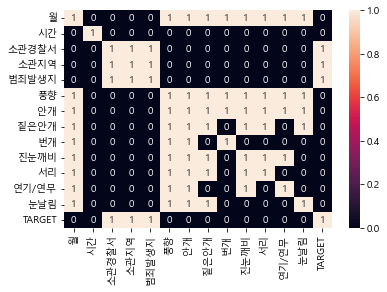

In [97]:
# 범주형-범주형 상관분석 (Cramer's V)
o_cols = ['월', '시간', '소관경찰서', '소관지역', '범죄발생지', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림', 'TARGET']
df_ = df[o_cols].astype(int)
df_o = pd.DataFrame(index=o_cols, columns=o_cols)
for col in df_o.columns:
    for i in df_o.index:
        observed_table = pd.crosstab(df[i], df[col], margins=False)
        df_o.loc[i,col] = association(observed_table, method='cramer')
        
sns.heatmap(abs(df_o) > 0.1, annot=True)

## RandomForest를 활용한 특성 선택

In [102]:
%%time
trainx, testx, trainy, testy = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1],
                                               test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=7, random_state=42)
rf.fit(trainx, trainy)
print(rf.score(testx, testy))
pred = rf.predict(testx)
print(confusion_matrix(testy,pred))
print(f"f1 score: {f1_score(testy, pred, average='macro')}")
print(pd.DataFrame(rf.feature_importances_, index=df.columns[1:-1]))

0.5420566283615685
[[5315  955 1021]
 [2117 2191  827]
 [1974  837 1645]]
f1 score: 0.510372566820645
                0
월        0.013080
요일       0.013677
시간       0.015633
소관경찰서    0.181126
소관지역     0.151209
사건발생거리   0.028547
강수량(mm)  0.009575
강설량(mm)  0.004071
적설량(cm)  0.005464
풍향       0.008472
안개       0.001407
짙은안개     0.000641
번개       0.001294
진눈깨비     0.001078
서리       0.000971
연기/연무    0.001523
눈날림      0.000675
범죄발생지    0.561556
CPU times: total: 1min
Wall time: 1min 1s


- 여기서도 소관경찰서, 소관지역, 범죄발생지만 중요도 0.1을 상회함

In [104]:
%%time
trainx, testx, trainy, testy = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1],
                                               test_size=0.2, random_state=42)

feat_selector = SelectFromModel(RandomForestClassifier(n_estimators=1000, random_state=42), threshold='median')
feat_selector.fit(trainx, trainy)

feat_scores = pd.DataFrame()
feat_scores['Attribute'] = trainx.columns
feat_scores['Support'] = feat_selector.get_support()
feat_scores[feat_scores['Support']==True]
slt = feat_scores[feat_scores['Support']==True]
slt

CPU times: total: 2min 3s
Wall time: 2min 3s


,Attribute,Support
0,월,True
1,요일,True
2,시간,True
3,소관경찰서,True
4,소관지역,True
5,사건발생거리,True
6,강수량(mm),True
9,풍향,True
17,범죄발생지,True


In [110]:
%%time
trainx, testx, trainy, testy = train_test_split(df[slt.Attribute.values], df.iloc[:,-1],
                                               test_size=0.2, random_state=42)

feat_selector = SelectFromModel(RandomForestClassifier(n_estimators=1000, random_state=42), threshold='median')
feat_selector.fit(trainx, trainy)

feat_scores = pd.DataFrame()
feat_scores['Attribute'] = trainx.columns
feat_scores['Support'] = feat_selector.get_support()
feat_scores[feat_scores['Support']==True]
slt2 = feat_scores[feat_scores['Support']==True]
slt2

CPU times: total: 2min 17s
Wall time: 2min 17s


,Attribute,Support
2,시간,True
3,소관경찰서,True
5,사건발생거리,True
7,풍향,True
8,범죄발생지,True
